## Подготовка

**инструкция, если нет ядра для `jupiter notebook`** <br> 
1. прописываем следующие команды в терминале:<br>
- `python -m venv venv`
- `pip install librosa matplotlib seaborn pandas scikit-learn ipykernel`
2. выбираем cозданный `venv` для нашего проекта

В качестве ядра выбираем `venv` из этой директории

In [1]:
%matplotlib inline  
import librosa
import librosa.display
import IPython
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

In [2]:
audio_data = 'example.mp3'
y, sr = librosa.load(audio_data)

## Анализ сигнала:

- отрисовать сигнал в амплитудно-временной форме

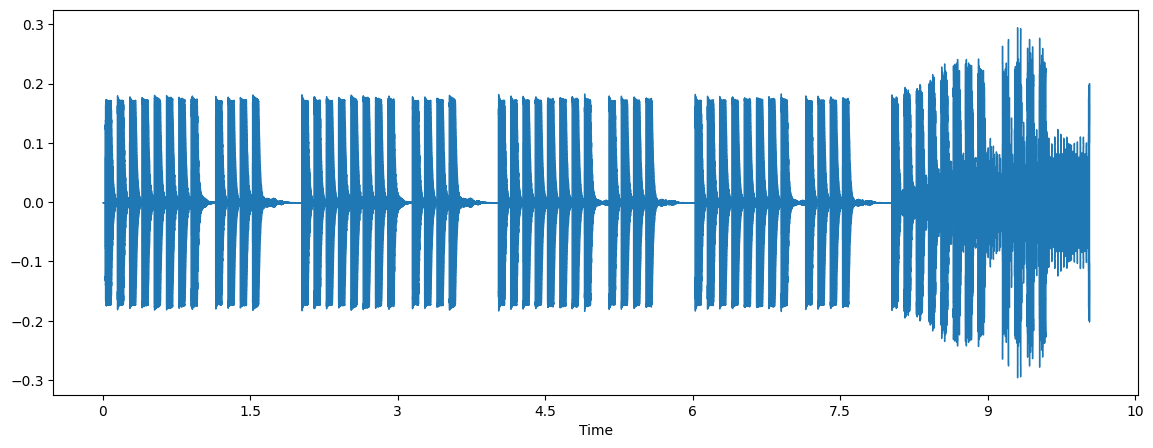

In [3]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

- используя преобразование Фурье отрисовать частотный спектр

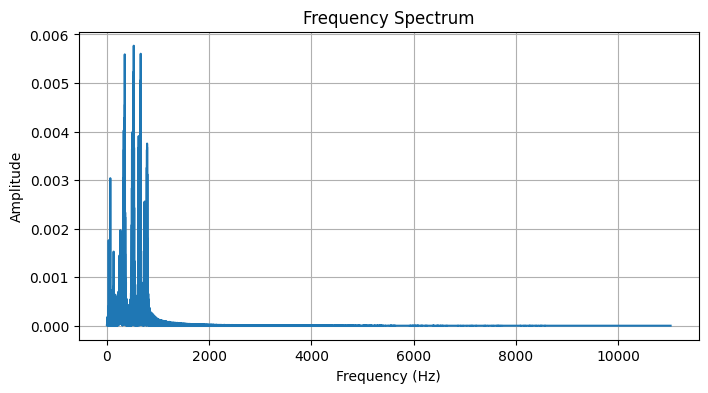

In [4]:
from scipy.fftpack import fft
# применение fft к сигналу
spectrum = fft(y)

N = len(spectrum) # Количество точек в FFT
frequencies = np.fft.fftfreq(N, 1 / sr) # Частоты соответствующих бинов
 
plt.figure(figsize=(8, 4))
plt.plot(frequencies[:N//2], np.abs(spectrum[:N//2]) / N)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()

- отрисовать спектрограмму сигнала

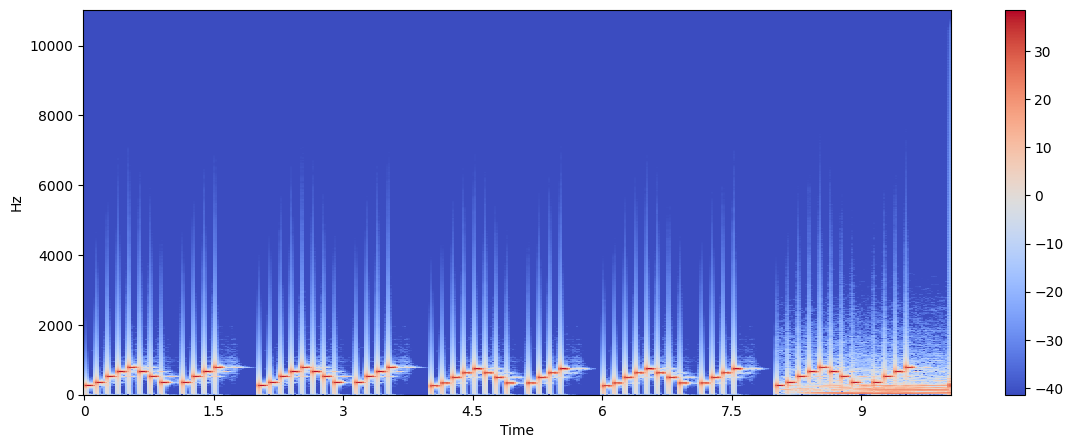

In [5]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

## Выделение признаков:


In [6]:
y_harmonic, y_percussive = librosa.effects.hpss(y) # гармоническо-перкуссивная сепарация

- вывести значение темпа и количество бит (написать в чем состояла ошибка
при выведении битов в приложенном файле)


Решение ошибки: <br>
`seaborn.barplot()` ожидает данные в формате `DataFrame`, а не в виде отдельных массивов. <br>
Для решения проблемы импортируем `pandas`, а затем преобразуем наши данные в `DataFrame`. <br>
*Чтоб не загрязнять решение исправлением ошибки, импорт pandas оставил в секции **Подготовка**.* <br>

Detected Tempo: [95.703125] beats/min
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


C:\Users\ya\AppData\Local\Temp\ipykernel_44268\1105409425.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Beats', y='Time difference (s)', data=data, palette="BuGn_d", ax=ax)


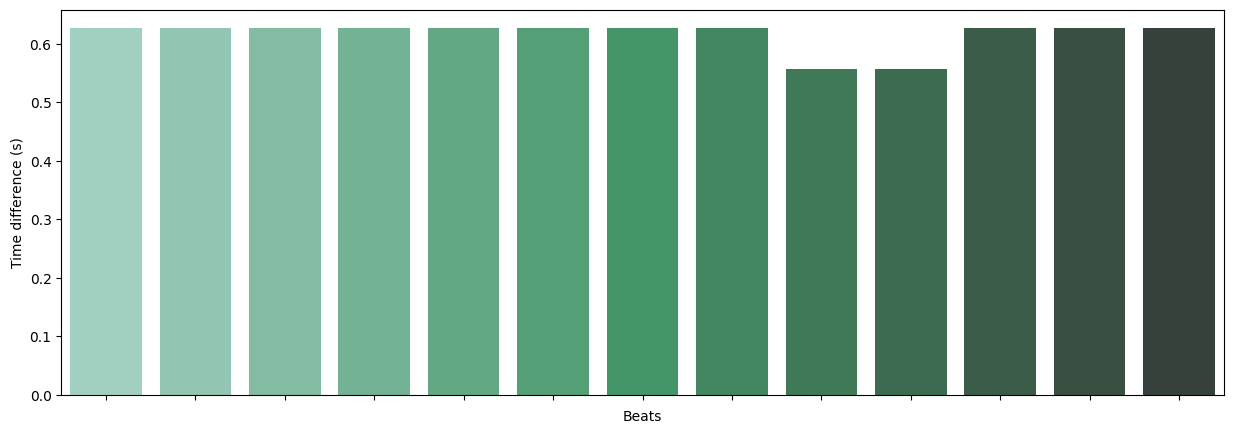

In [7]:
# Beat Extraction
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)
print('Detected Tempo: '+str(tempo)+ ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff=np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

print(beat_nums)

data = pd.DataFrame({'Beats': beat_nums, 'Time difference (s)': beat_time_diff})

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
g = sns.barplot(x='Beats', y='Time difference (s)', data=data, palette="BuGn_d", ax=ax)
g=g.set(xticklabels=[])

- получить и вывести в виде изображения и numpy массива мелкепстральные коэффициенты

Text(0.5, 1.0, 'MFCC')

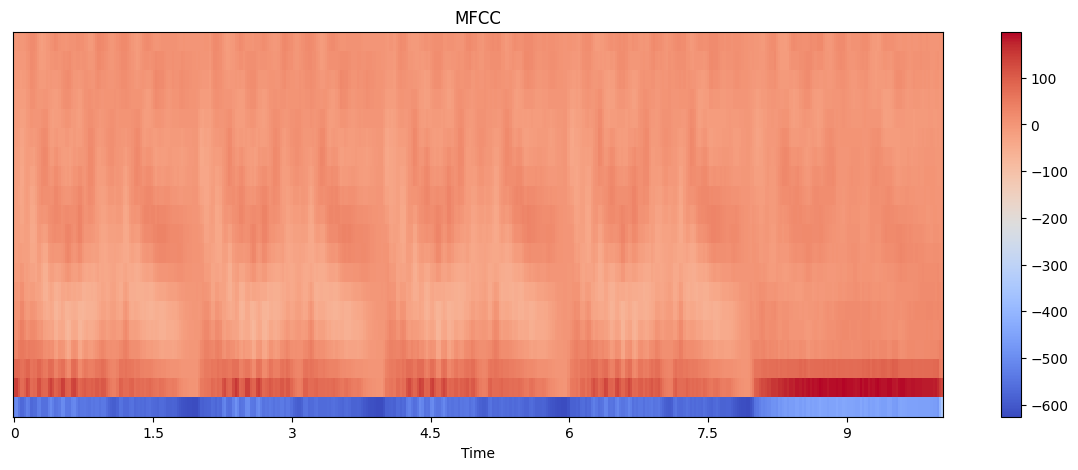

In [8]:
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

- получить и вывести изображение спектрального центроида на одном
изображении с сигналом в амплитудно-временной форме

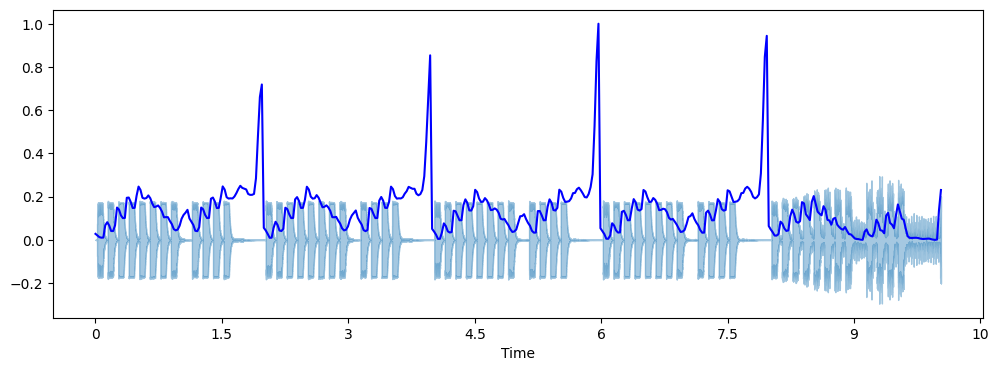

In [9]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_centroids = cent[0]
spectral_centroids.shape

# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

## Овет на вопрос

**Гармонические звуки** — это звуки с устойчивыми частотными паттернами (фортепиано, гитара, скрипка, зачастую голос). Они образуют периодические колебания и содержат основную частоту и её обертоны (гармоники). <br>
**Перкуссионные звуки** — это звуки с короткими и резкими изменениями во времени (барабаны, хлопки, щелчки). Они часто используются для ритмических акцентов и ударных эффектов. <br>
Разделение этих частей используется для решения следующих задач:
- Музыкальный анализ и аранжировка <br>
Например, при аранжировке можно вычленить ритмическую основу трека и наложить на неё новые гармонические элементы.
- Создание минусовок и ремиксов <br>
Можно извлечь ритм из трека и создать ремикс, сохраняя только ударные звуки или, наоборот, только мелодические части.
При удалении вокала можно работать с гармонической частью, поскольку голос часто содержится именно в ней.
- Обработка звука и улучшение качества аудиозаписей <br>
В процессе реставрации старых аудиозаписей можно раздельно обрабатывать гармонические и перкуссионные компоненты для снижения шума или улучшения качества.
- Ритмическая и тональная сегментация <br>
В задачах анализа музыки часто требуется определить ритмический рисунок или гармоническую структуру (например, для распознавания аккордов)
- Музыкальные приложения и обучающие системы <br>
В музыкальных обучающих приложениях (например, для гитары или фортепиано) можно анализировать только гармоническую часть, чтобы обучить пользователя точному воспроизведению мелодии.